In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df<- read.csv("BankChurners-2.csv")

In [3]:
sum(is.na(df))

[1] 0

In [4]:
head(df)

CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691,777,11914,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256,864,7392,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418,0,3418,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313,2517,796,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716,0,4716,2.175,816,28,2.500,0.000
713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010,1247,2763,1.376,1088,24,0.846,0.311


In [5]:
t0 <- table(df$Attrition_Flag)
prop.table(t0)*100


Attrited Customer Existing Customer 
         16.06596          83.93404 

The variable "Attrition Flag" describes what the customer status is. Existing Customer means that the 
customer is still doing business with the bank. Attrited Customer menas that the customer is no longer
doing business with the bank. As we can see from the table above 16% of customers left the bank and about
84% of customers are still doing business with the bank.

In [6]:
summary(df$Contacts_Count_12_mon)

mean_contacts <- mean(df$Contacts_Count_12_mon)
sd_contacts <- sd(df$Contacts_Count_12_mon)
contacts_z <- (df$Contacts_Count_12_mon -mean_contacts)/sd_contacts
summary(contacts_z)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   2.000   2.455   3.000   6.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.2195 -0.4116 -0.4116  0.0000  0.4924  3.2043 

I wanted to know if there were any outliers in the varialbe "Contacts Count 12 months" and as you can see from the second summary there are some data points about -2.21 standard devations below the mean and theres data points 3.2 standard devations above the mean. I believe that these outliers are imporant to show in the model. 

   
    Attrited Customer Existing Customer
  0                 7               392
  1               108              1391
  2               403              2824
  3               681              2699
  4               315              1077
  5                59               117
  6                54                 0

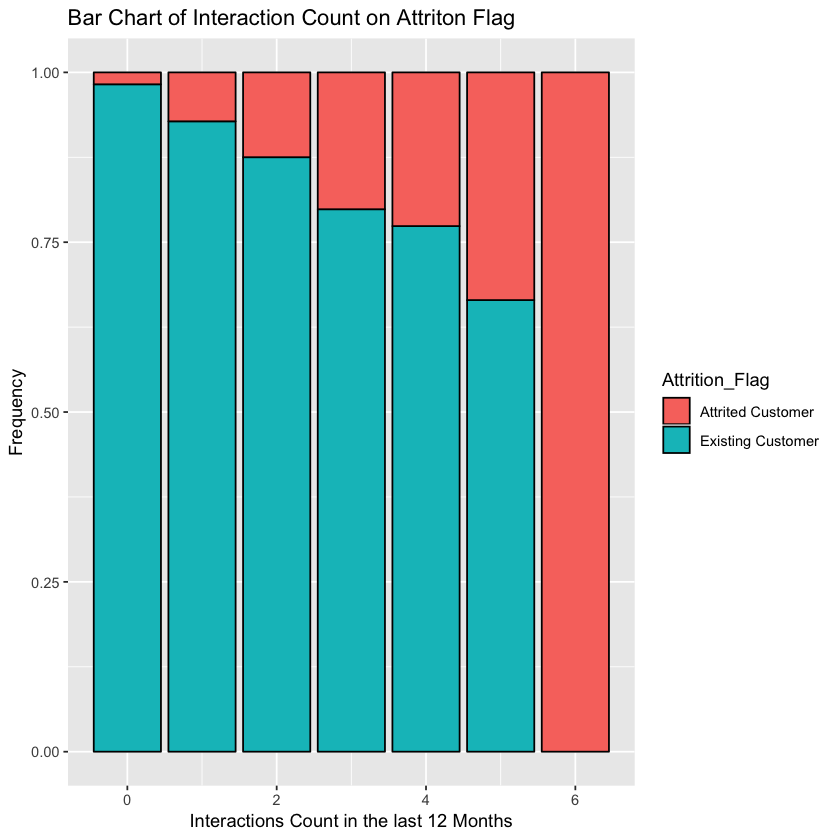

In [7]:
library(ggplot2)

table(df$Contacts_Count_12_mon, df$Attrition_Flag)

ggplot(df, aes(Contacts_Count_12_mon)) + 
  geom_bar(aes(fill = Attrition_Flag), position = "fill", color="black") + 
  xlab("Interactions Count in the last 12 Months") +
  ylab("Frequency") +
  ggtitle("Bar Chart of Interaction Count on Attriton Flag")

The graph Attrition Flag vs Interaction Count in the last 12 months show that the more the costomers interacted with the bank the more they became attrited customers. As you can see ablove the more customers called the more customers they lost. Because there are no unknowns in this varaible I will be using it in my CART model.

In [8]:
summary(df$Income_Category)

$120K +    $40K - $60K    $60K - $80K   $80K - $120K Less than $40K 
           727           1790           1402           1535           3561 
       Unknown 
          1112

The variable "Income Category" has some unknowns and since I dont want to deal with missing values I am not going to be using this variable in the CART Model 

                
                 Attrited Customer Existing Customer
  $120K +                      126               601
  $40K - $60K                  271              1519
  $60K - $80K                  189              1213
  $80K - $120K                 242              1293
  Less than $40K               612              2949
  Unknown                      187               925

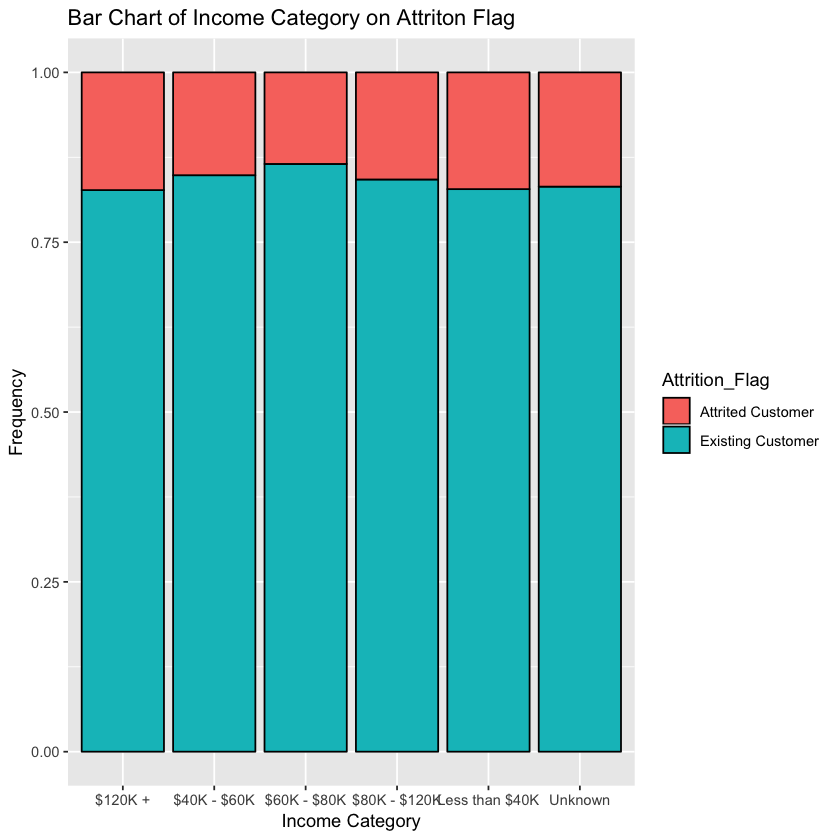

In [9]:
table(df$Income_Category, df$Attrition_Flag)
ggplot(df, aes(Income_Category)) + 
  geom_bar(aes(fill = Attrition_Flag), position = "fill", color="black") + 
  xlab("Income Category" ) +
  ylab("Frequency") +
  ggtitle("Bar Chart of Income Category on Attriton Flag")

          
           Attrited Customer Existing Customer
  Blue                  1519              7917
  Gold                    21                95
  Platinum                 5                15
  Silver                  82               473

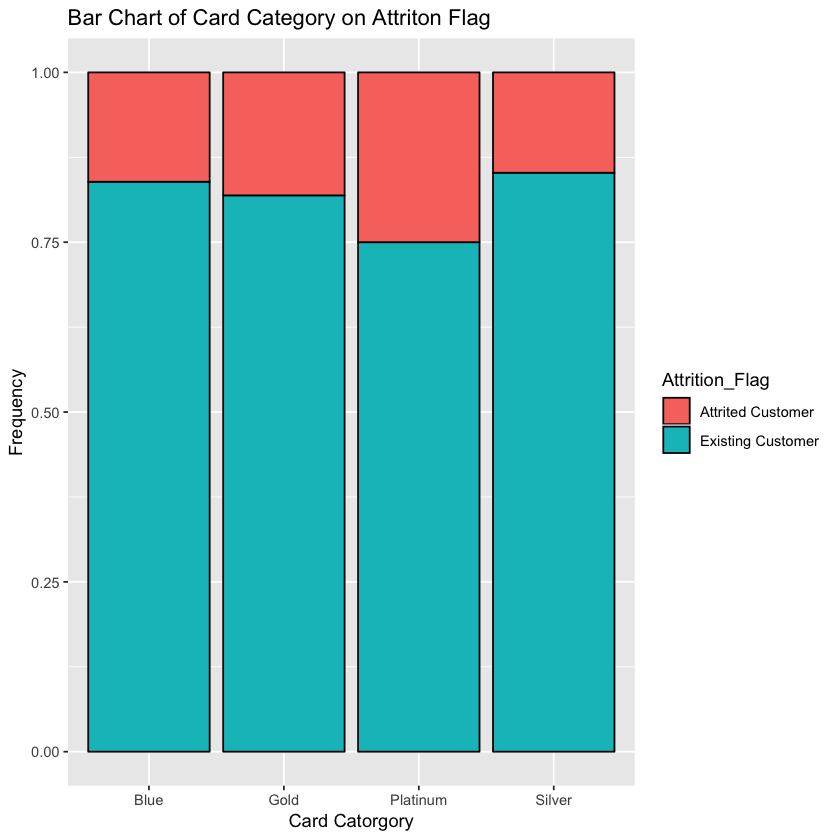

In [10]:
table(df$Card_Category, df$Attrition_Flag)

ggplot(df, aes(Card_Category)) + 
  geom_bar(aes(fill = Attrition_Flag), position = "fill", color="black") + 
  xlab("Card Catorgory") +
  ylab("Frequency") +
  ggtitle("Bar Chart of Card Category on Attriton Flag")

In [ ]:
The variable "Card Catorgory" shows that it doesnt really matter what card the customer has 
that will not have impact on if the customers leaves the bank or not but I will be adding this
variable to the model because I want to see if the model will leave it out or add it. 

   
    Attrited Customer Existing Customer
  1               233               677
  2               346               897
  3               400              1905
  4               225              1687
  5               227              1664
  6               196              1670

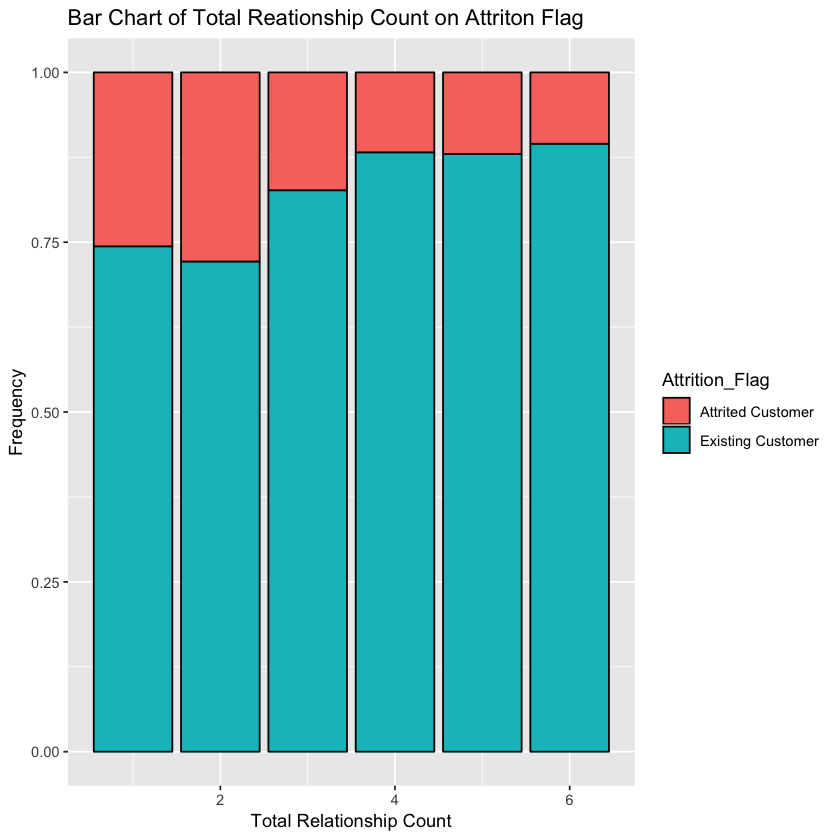

In [11]:
table(df$Total_Relationship_Count, df$Attrition_Flag)

ggplot(df, aes(Total_Relationship_Count)) + 
  geom_bar(aes(fill = Attrition_Flag), position = "fill",color="black") + 
  xlab("Total Relationship Count") +
  ylab("Frequency") +
  ggtitle("Bar Chart of Total Reationship Count on Attriton Flag")

The variable "Total Relationship Count" means how many services the customer use with the bank.
As you can see from the graph above customers are more likely to stop using the bank's service 
if they don't have a lot of relationships between themselves and the bank.

In [14]:
table(df$Months_on_book, df$Attrition_Flag)

    
     Attrited Customer Existing Customer
  13                 7                63
  14                 1                15
  15                 9                25
  16                 3                26
  17                 4                35
  18                13                45
  19                 6                57
  20                13                61
  21                10                73
  22                20                85
  23                12               104
  24                28               132
  25                31               134
  26                24               162
  27                23               183
  28                43               232
  29                34               207
  30                58               242
  31                34               284
  32                44               245
  33                48               257
  34                57               296
  35                45               272
  36       

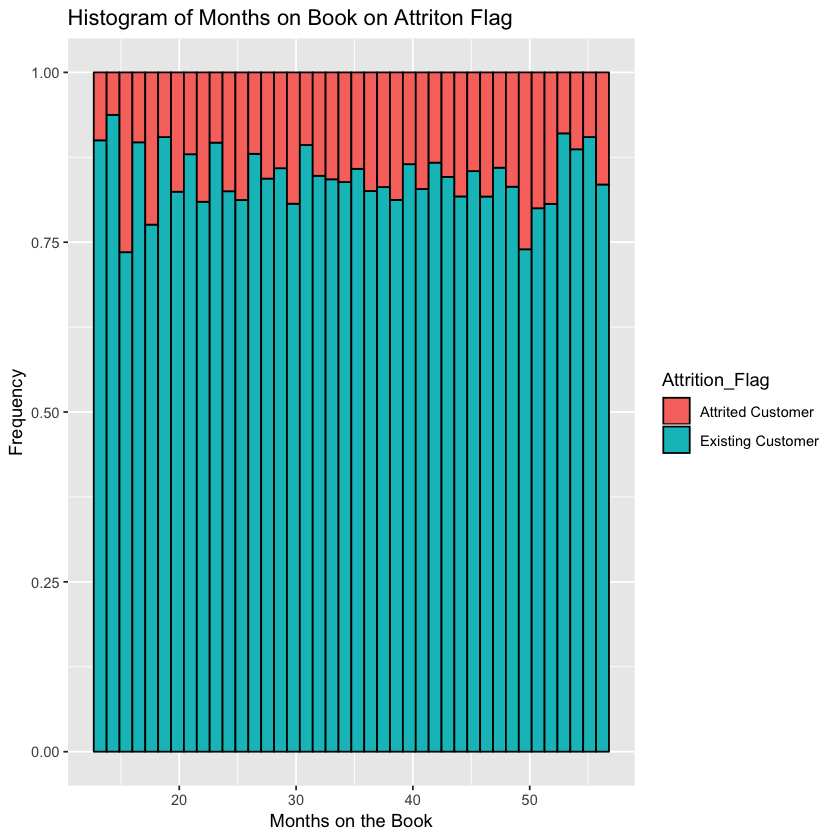

In [18]:
ggplot(df, aes(Months_on_book)) +
    geom_histogram(aes(fill = Attrition_Flag), color="black",
    position = "fill", bins = 40)+
    xlab("Months on the Book") +
    ylab("Frequency") +
    ggtitle("Histogram of Months on Book on Attriton Flag")

In [ ]:
The variable "Months on Book" doesnt really show a patteren with customers leaving but 
I still think its important to have this variable the model because I do see that either the customer spent
little time with the bank or a really long time before they stopped doing business. 

   
    Attrited Customer Existing Customer
  0                15                14
  1               100              2133
  2               505              2777
  3               826              3020
  4               130               305
  5                32               146
  6                19               105

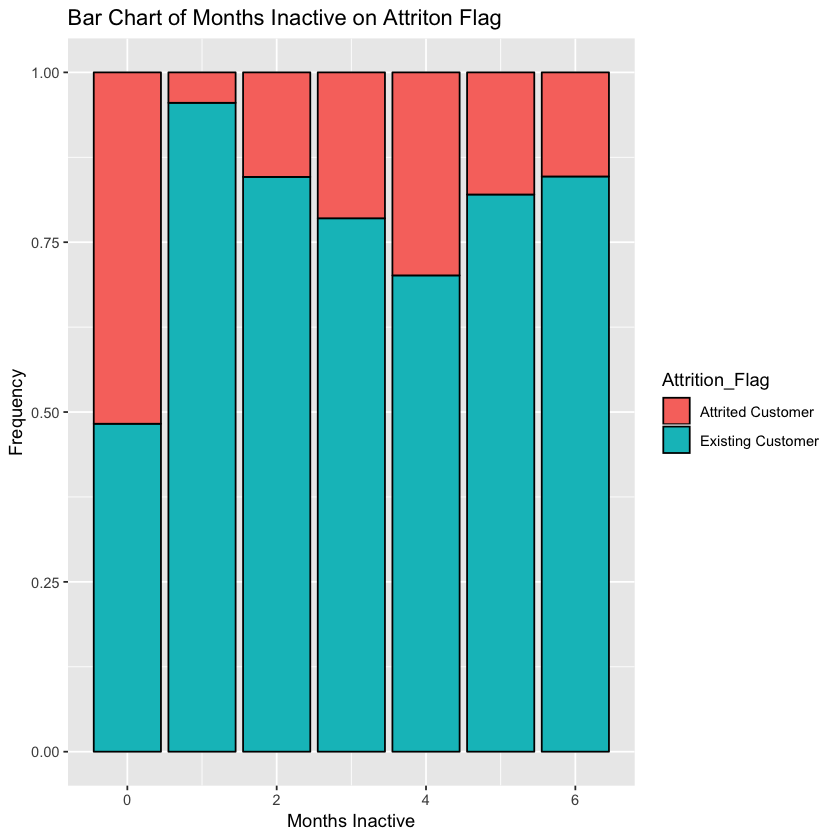

In [20]:
table(df$Months_Inactive_12_mon, df$Attrition_Flag)

ggplot(df, aes(Months_Inactive_12_mon)) + 
  geom_bar(aes(fill = Attrition_Flag), position = "fill",color="black") + 
  xlab("Months Inactive") +
  ylab("Frequency") +
  ggtitle("Bar Chart of Months Inactive on Attriton Flag")

"Months Inactive" shows that people that use their bank services alot will be most likely to leave then 
that have been inactive for more then 4 months 

     
      Attrited Customer Existing Customer
  10                  4                 0
  11                  1                 1
  12                  4                 0
  13                  3                 2
  14                  8                 1
  15                 12                 4
  16                  8                 5
  17                 10                 3
  18                 15                 8
  19                  7                 4
  20                  9                10
  21                 11                22
  22                 11                24
  23                  8                26
  24                  9                41
  25                 14                43
  26                 11                45
  27                 16                66
  28                 17                56
  29                 14                61
  30                 12                72
  31                 23                77
  32                 25     

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


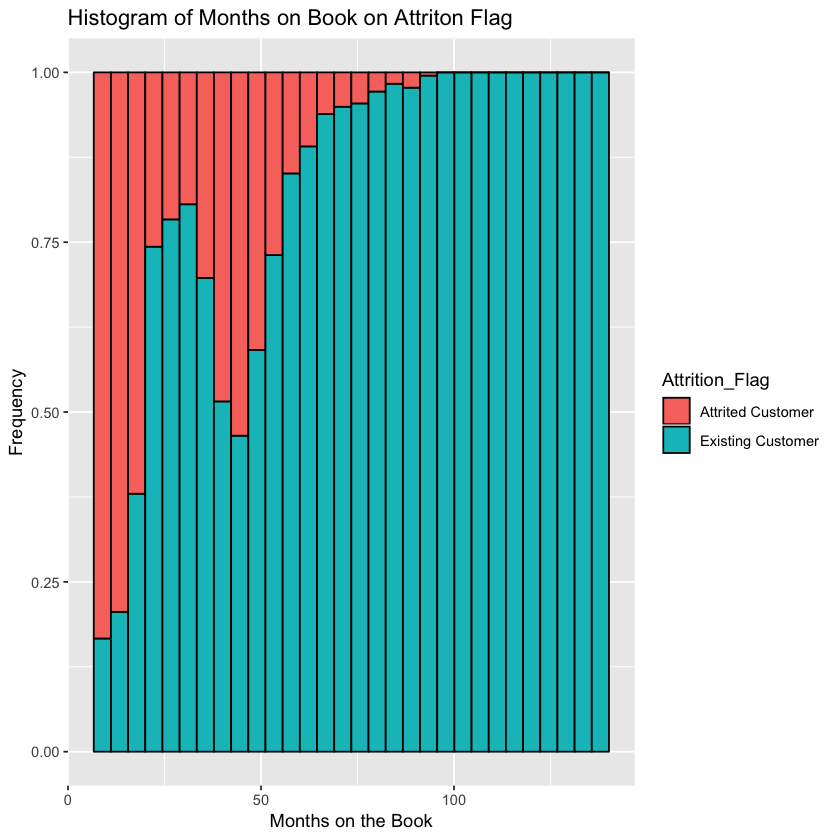

In [21]:
table(df$Total_Trans_Ct, df$Attrition_Flag)

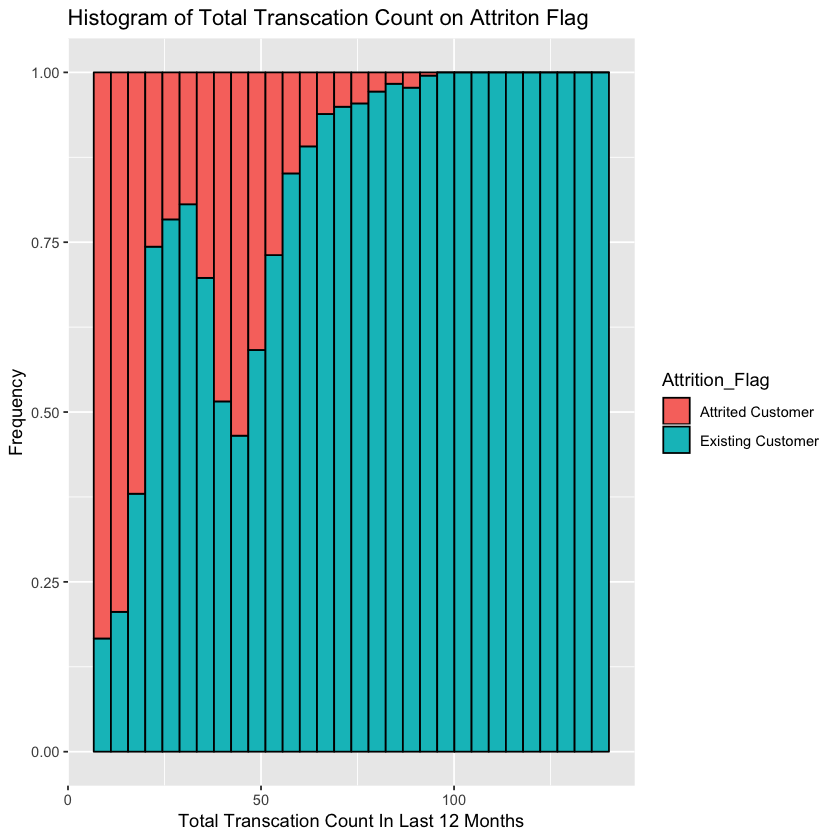

In [27]:
ggplot(df, aes(Total_Trans_Ct)) +
    geom_histogram(aes(fill = Attrition_Flag), color="black",
    position = "fill", bins =30)+
    xlab("Total Transcation Count In Last 12 Months") +
    ylab("Frequency") +
    ggtitle("Histogram of Total Transcation Count on Attriton Flag")

The variable "Total_Trans_Ct" tells us the number of transactions in the last 12 months. As you can see from the graph above there is a patteren that is noticable. Customers that make less transactions in 12 months more likely to leave the bank.  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0230  0.1760  0.2749  0.5030  0.9990 

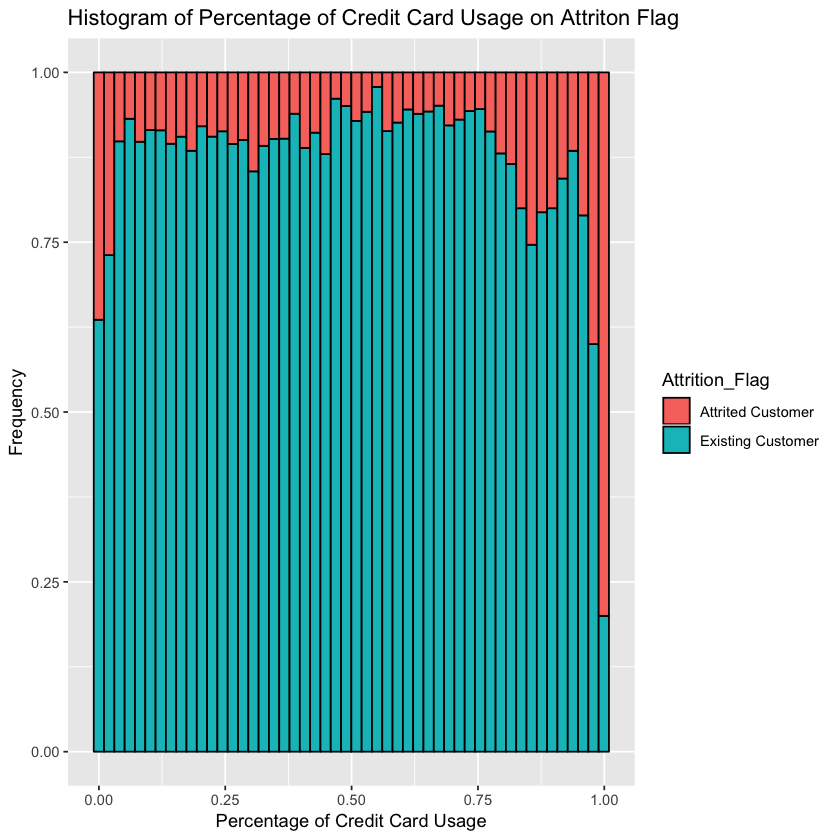

In [38]:
summary(df$Avg_Utilization_Ratio, df$Attrition_Flag)

ggplot(df, aes(Avg_Utilization_Ratio)) +
    geom_histogram(aes(fill = Attrition_Flag), color="black",
    position = "fill", bins =50)+
    xlab("Percentage of Credit Card Usage") +
    ylab("Frequency") +
    ggtitle("Histogram of Percentage of Credit Card Usage on Attriton Flag")

The variable "Precentage of Card Usage" shows the percentage of credit card usage.As you can see from 
the graph above the more you use your card the more likely you are to leave the bank. Also you can see 
that if customers don't use their card that much they will also leave the bank. This variable will be great 
to put in our model to see that happenes.